# DATA CLEANING PROJECT

💡**Goal: <u>Project showcases two major datacleaning practices [ Handling Missing Values, Scaling and normalization ]with detailed tutorial.</u>**

💡**Tools used : panda, numpy, sklearn, scipy, matplotlib, seaborn, mlxtend, python**

💡**Dataset - FBI's National Instant Criminal Background Check System (November 1998 – March 2020)** 

**[Dataset Link](https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv)-currently covers November 1998 – March 2020.**

**The FBI provides data on the number of firearm checks by month, state, and type — but as a PDF on their site.** 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer # Imputation of missing values
from scipy import stats # for Box-Cox Transformation
from mlxtend.preprocessing import minmax_scaling # for min_max scaling
import seaborn as sns # variety of plotting modules.

In [2]:
# Path of file
file_path = (r'C:\Users\anuja\Downloads\nics-firearm-background-checks.csv')
data_set = pd.read_csv(file_path, encoding='utf8')

## Step3 -Data Cleaning
* (1) Handling Missing Values
* (2) Scaling and normalization

### 💥(1) Handling Missing Values

✏️**Taking a look at Dataset using sample() command**

In [3]:
# look at a few rows of the data_set to spot missing data
data_set.sample(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
3470,2014-12,Colorado,4623.0,NaN,20924.0,19494.0,1067.0,1185,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,47309
688,2019-03,Montana,1290.0,0.0,3703.0,4218.0,351.0,310,8.0,3.0,...,2.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,11143
5685,2011-08,Maine,0.0,NaN,2089.0,3125.0,51.0,141,0.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5647
5727,2011-07,Delaware,0.0,NaN,737.0,561.0,18.0,31,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1348
8759,2006-12,Illinois,32090.0,NaN,5986.0,12279.0,NaN,341,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50696


So there are some missing values in the dataset.

✏️**Finding the number of Missing Values**

In [4]:
# get the number of missing data points per column
missing_values_count = data_set.isnull().sum()

# look at the number missing points in the first ten columns
missing_values_count[0:10]

month                  0
state                  0
permit                24
permit_recheck     11385
handgun               20
long_gun              19
other               6985
multiple               0
admin                 23
prepawn_handgun     1943
dtype: int64

So there are many Missing Values in the dataset.

✏️**Checking Percentage of the Missing values in dataset**

In [5]:
# how many total missing values are there?
total_cells = np.product(data_set.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

40.50753972932961

**40% of data is missing in the dataset. If this percentage is less, then we can use dropna() command.Let's take a closer look at some of the columns with missing values and try to figure out what might be going on with them.**



### <u>Data Intuition Technique</u> 
**We should figure out why so much data is missing. We can do this by asking a simple question-**
## Is this value missing becuase it wasn't recorded or becuase it dosen't exist?
* <b>If a value is missing becuase it doens't exist then it doesn't make sense to try and guess what it might be. These values can be kept as NaN.</b>

### <u>Data Imputation Technique</u>
* <b>On the other hand, if a value is missing becuase it wasn't recorded, then we should guess what it might have been based on the other values in that column and row.</b>

✏️**Data Imputation**

1- Bfill Command

*If we drop the missing values, then we might lose a large part of Dataset. Hence we should fill the Missing values with whatever value comes directly after it in the same column using 'bfill'(We can also replace the missing data with zero by using fillna command.)*

In [6]:
# Imputing data based on other values in that column  
dataset_bfill = data_set.fillna(method = 'bfill', axis=0).fillna(0)

**OR**

2- Simple Imputer Method -The default behavior fills in the mean value for imputation.

In [7]:
# using pd.to_numeric to convert data in numeric values.If incompatible with conversion, reducing to NaNs
data_set_conv_num = data_set.apply(pd.to_numeric, errors='coerce')
data_set_conv_num.fillna(0, inplace=True)

In [8]:
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(data_set_conv_num)

**OR**

3- Filling all empty values with Zero using fillna command

In [9]:
dataset_zero = data_set.fillna(0)

**OR**

4- Dropping Columns with Missing Values

In [10]:
# Dropping Columns that contains Null Values
dataset_drop = data_set.dropna(axis = 1)

**✏️Comparing All Four Solutions of Handling Missing Data**

1- Bfill Command 

2- Simple Imputer Method

3- Filling all empty values with Zero using fillna command

4- Dropping Columns with Missing Values

Based on intution, out of Simple Imputer and Bfill method, we can chose Simple Imputer method for now

Hence, now data_with_imputed_values dataset is cleaned data and to work further.

### 💥(2) Scaling and normalization

In both we transform the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data.

✏️**Scaling**
This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like **support vector machines, or SVM or k-nearest neighbors, or KNN**. With these algorithms, a change of "1" in any numeric feature is given the same importance.

For eg 1 euro = 80 inr, thus we can relate it using scaling.

Text(0.5, 1.0, 'Scaled data')

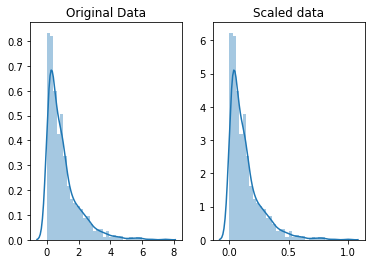

In [13]:
import matplotlib.pyplot as plt
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

## Observation
 The shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 5.

✏️**Normality**
The point of normalization is to change your observations so that they can be described as a normal distribution.
Data Normalization is done if you're going to use a machine learning or statistics technique that assumes your data is normally distributed. 
Some examples: **t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes**. 

Pro tip: any method with "Gaussian" in the name probably assumes normality.
The method were using to normalize here is called the Box-Cox Transformation.


Text(0.5, 1.0, 'Normalized data')

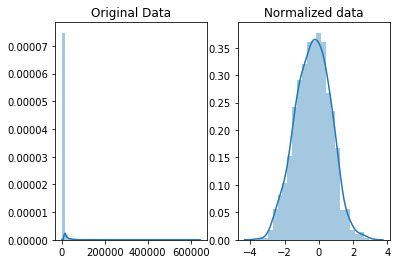

In [15]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(data_set)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(data_with_imputed_values, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

## Observation
The shape of our data has changed from L-shaped to bell curve.

# 🔑Conclusion
This project covers two data cleaning techniques which are Handling Missing Values and Scaling - Normalization Techniques. There are other data cleaning techniques too which can be used as per the need in a project.